In [9]:
import pandas as pd
import json

In [47]:
df = pd.read_csv('./chicken_4lb.txt', sep=',', header=None, names=['time','air','meat'])
df['time'] = pd.to_datetime(df['time'],unit='s',utc=True)

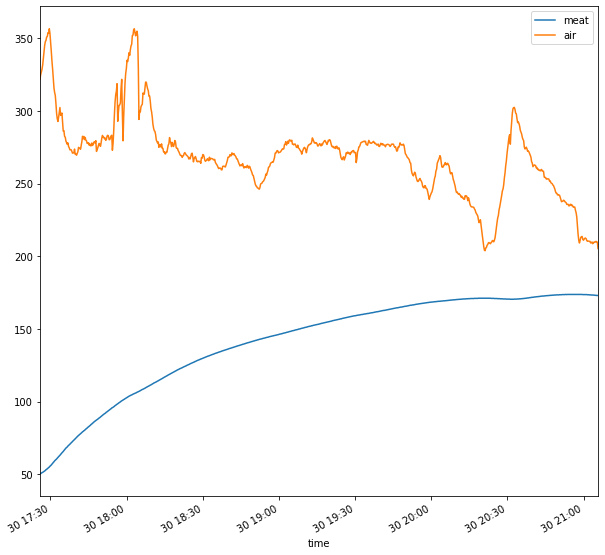

In [48]:
df.plot('time',['meat','air'], figsize=(10,10))

In [135]:
def plot(path):
    df = pd.read_csv(path, sep='|', header=None, names=['time','topic','temps'])
    df['time'] = pd.to_datetime(df['time'],unit='s',utc=True).dt.tz_convert(tz='US/Central')
    df['air'] = df.temps.apply(lambda x: float(x.split(',')[0][2:]))
    df['meat'] = df.temps.apply(lambda x: float(x.split(',')[1][:-1]))
    start_time = df.time.iloc[0]
    end_time = df.time.iloc[-1]
    print(start_time)
    print(end_time)
    print(end_time - start_time)
    df.plot('time',['meat','air'], figsize=(15,10), grid=True)

2020-06-13 10:01:03-05:00
2020-06-13 17:24:04-05:00
0 days 07:23:01


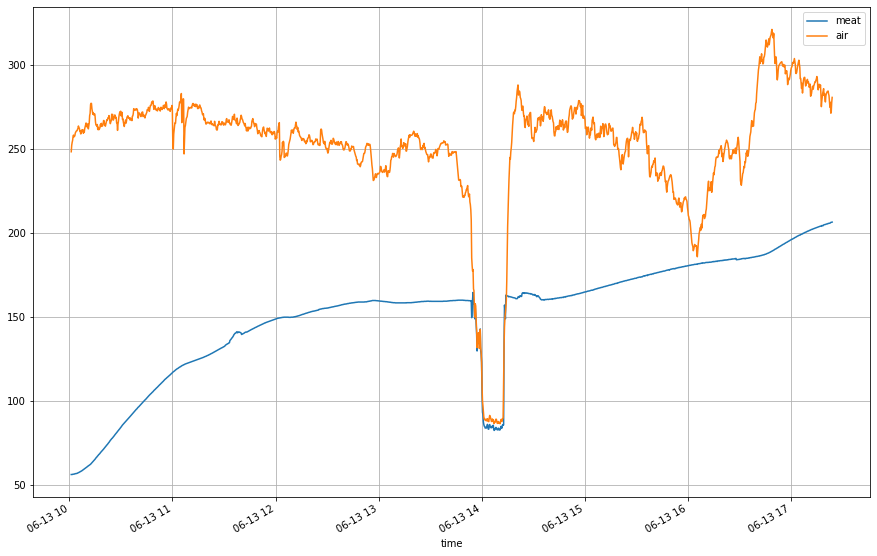

In [136]:
plot('./boston_6lb.txt')

2020-06-28 15:18:02-05:00
2020-06-28 16:51:11-05:00
0 days 01:33:09


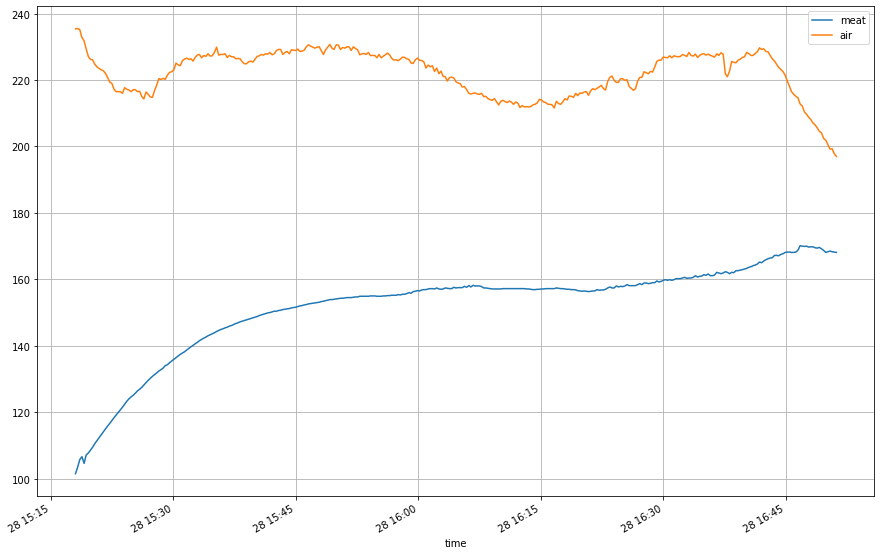

In [137]:
plot('./chicken_new_smoker.txt')

2020-07-02 23:39:56-05:00
2020-07-03 16:07:34-05:00
0 days 16:27:38


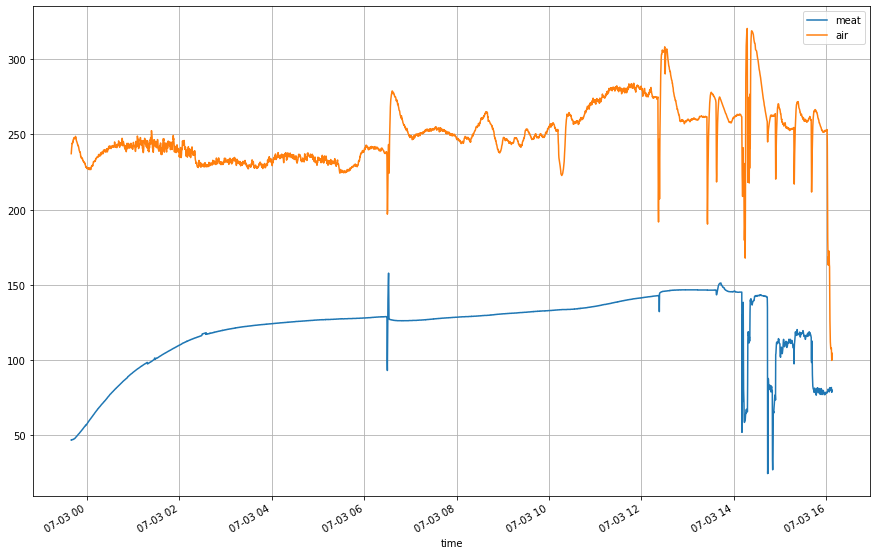

In [138]:
plot('./brisket_10lb.txt')

2020-08-01 07:58:10-05:00
2020-08-01 20:55:20-05:00
0 days 12:57:10


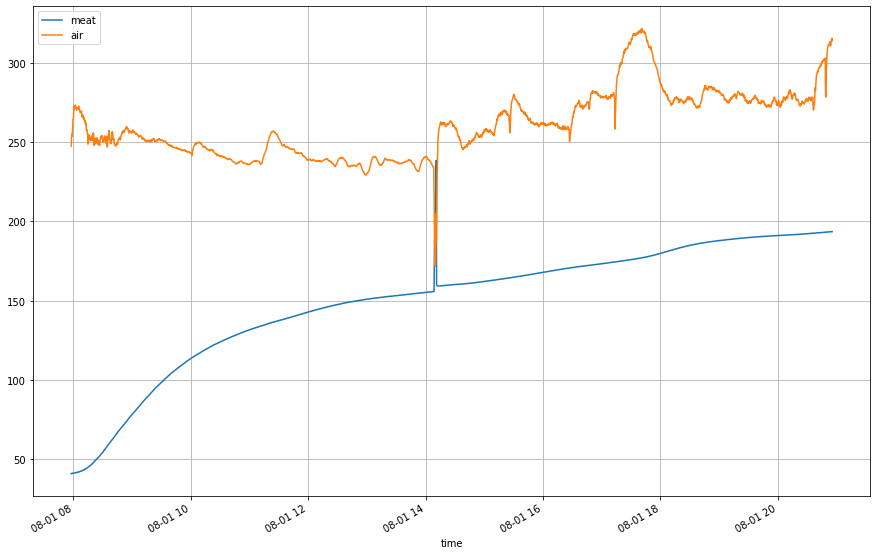

In [139]:
plot('./boston_8lb.txt')

In [131]:
def plotJSON(path):
    df = pd.read_csv(path, sep='|', header=None, names=['time','topic','payload'])
    df['payloadParsed'] = df['payload'].apply(lambda x: json.loads(x[2:-1]))
    df = pd.json_normalize(df['payloadParsed'])
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s',utc=True).dt.tz_convert(tz='US/Central')
    start_time = df.timestamp.iloc[0]
    end_time = df.timestamp.iloc[-1]
    print(start_time)
    print(end_time)
    print(end_time - start_time)
    df.plot('timestamp',['meat','air'], figsize=(15,10), grid=True)

2020-09-04 19:46:17-05:00
2020-09-05 12:40:47-05:00
0 days 16:54:30


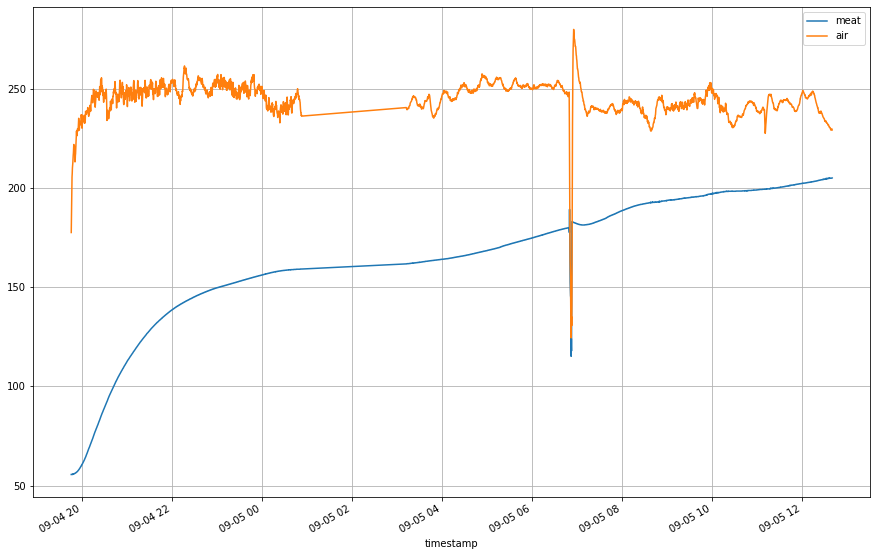

In [132]:
plotJSON('./brisket_14lb.txt')